In [0]:
Dir_MD='drive/My Drive/DL/keypoints-gamma/'

In [0]:
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [0]:
with open(Dir_MD+'keypoint_labels.json') as json_file:
    data = json.load(json_file)

In [0]:
from PIL import Image
images=[]
for image in data:
  img = Image.open(Dir_MD+'dataset/'+image)
  img.thumbnail((300,600), Image.ANTIALIAS)
  img= np.array(img,dtype='float')
  img=img/255.
  images.append(img)

In [5]:
images[0].shape

(200, 300, 3)

In [0]:
x_train = np.array(images,dtype='float')
x_train = x_train.reshape(-1,200,900,1)

In [7]:
x_train.shape

(150, 200, 900, 1)

In [8]:
x_train[0].shape

(200, 900, 1)

In [0]:
y_train=[]
Point=[]
Key_point= list(data['F_353253074480151_20181019093117.png'])
for image in data:
  Point=[]
  for point in Key_point:
    Point.append(data[image][point]['x']/1000)
    Point.append(data[image][point]['y']/1000)
  y_train.append(Point)

In [10]:
y_train[0]

[0.682, 0.212, 0.756, 0.512, 0.919, 0.517]

In [0]:
y_train= np.array(y_train, dtype='float')

In [0]:
# import tensorflow
# tensorflow.__version__

In [13]:
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

Using TensorFlow backend.


In [14]:
model = Sequential()

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(200,900,1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(6))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 900, 32)      288       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 200, 900, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 200, 900, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 200, 900, 32)      9216      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 200, 900, 32)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 200, 900, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 450, 32)     

In [0]:
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mae'])


In [0]:
# from keras.callbacks import ModelCheckpoint
# filepath="weights.best.hdf5"
# checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint]

In [17]:
history=model.fit(x_train,y_train,epochs = 1000,batch_size = 24,validation_split = 0.2)

Train on 120 samples, validate on 30 samples
Epoch 1/1000
120/120 [==============================] - 20s 163ms/step - loss: 6660.1877 - mae: 34.2734 - val_loss: 0.2736 - val_mae: 0.4791
Epoch 2/1000
120/120 [==============================] - 4s 35ms/step - loss: 139.7665 - mae: 7.6661 - val_loss: 16.0745 - val_mae: 3.2452
Epoch 3/1000
120/120 [==============================] - 4s 35ms/step - loss: 54.9554 - mae: 5.6026 - val_loss: 1281.3925 - val_mae: 28.3042
Epoch 4/1000
120/120 [==============================] - 4s 35ms/step - loss: 22.0932 - mae: 3.6649 - val_loss: 6828.6539 - val_mae: 59.7983
Epoch 5/1000
120/120 [==============================] - 4s 35ms/step - loss: 14.2052 - mae: 2.9249 - val_loss: 17781.7012 - val_mae: 88.0619
Epoch 6/1000
120/120 [==============================] - 4s 35ms/step - loss: 4.3418 - mae: 1.3682 - val_loss: 30999.5484 - val_mae: 112.5590
Epoch 7/1000
120/120 [==============================] - 4s 35ms/step - loss: 2.1911 - mae: 1.0805 - val_loss: 4138

In [0]:
def plot_sample(X,y,axs):
    '''
    kaggle picture is 96 by 96
    y is rescaled to range between -1 and 1
    '''
    
    axs.imshow(X.reshape(200,300),cmap="gray")
    axs.scatter(1000*y[0::2],1000*y[1::2])

    
def plot_loss(hist,name,plt):

    loss = hist['loss'][20:]
    val_loss = hist['val_loss'][20:]

    plt.plot(loss,"--",linewidth=3,label="train:"+name)
    plt.plot(val_loss,linewidth=3,label="val:"+name)


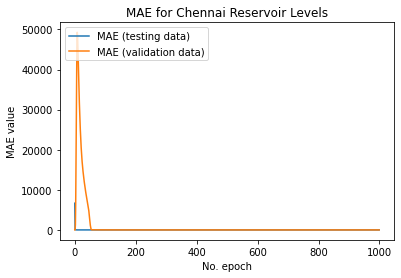

In [19]:
plt.plot(history.history['loss'], label='MAE (testing data)')
plt.plot(history.history['val_loss'], label='MAE (validation data)')
plt.title('MAE for Chennai Reservoir Levels')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

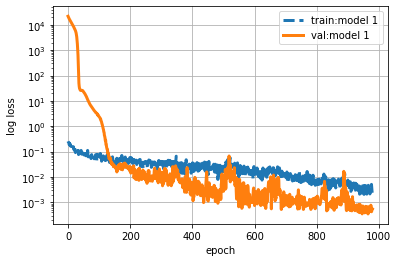

In [20]:
plot_loss(history.history,"model 1",plt)
plt.legend()
plt.grid()
plt.yscale("log")
plt.xlabel("epoch")
plt.ylabel("log loss")
plt.show()

In [21]:
y_train[0]

array([0.682, 0.212, 0.756, 0.512, 0.919, 0.517])

In [0]:
X_train=x_train.reshape(150,200*900*1)

In [0]:
def plot_loss(hist,name,plt):

    loss = hist['loss'][20:]
    val_loss = hist['val_loss'][20:]

    plt.plot(loss,"--",linewidth=3,label="train:"+name)
    plt.plot(val_loss,linewidth=3,label="val:"+name)


In [33]:
%%time
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(100,input_dim=X_train.shape[1]))
model.add(Activation('relu'))
model.add(Dense(6))

sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)
# for i in range(len(x_train)):
#   print(x_train[i].shape)
#   print(x_train[i].size)
hist = model.fit(X_train, y_train, nb_epoch=500, validation_split=0.2,verbose=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


KeyboardInterrupt: ignored

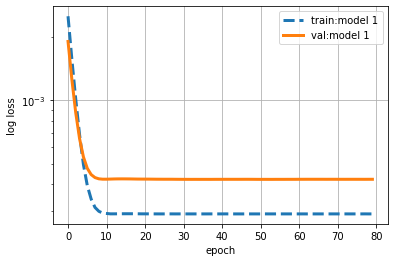

In [25]:
plot_loss(hist.history,"model 1",plt)
plt.legend()
plt.grid()
plt.yscale("log")
plt.xlabel("epoch")
plt.ylabel("log loss")
plt.show()

In [0]:
from keras.models import model_from_json

def save_model(model,name):
    '''
    save model architecture and model weights
    '''
    json_string = model.to_json()
    open(name+'_architecture.json', 'w').write(json_string)
    model.save_weights(name+'_weights.h5')
    
def load_model(name):
    model = model_from_json(open(name+'_architecture.json').read())
    model.load_weights(name + '_weights.h5')
    return(model)

save_model(model,"model1")
model = load_model("model1")

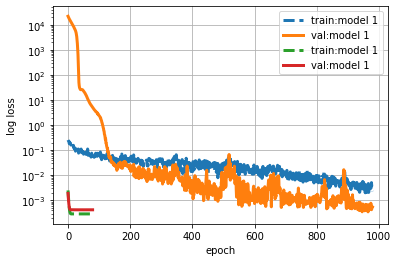

In [31]:
plot_loss(history.history,"model 1",plt)
plot_loss(hist.history,"model 1",plt)
plt.legend()
plt.grid()
plt.yscale("log")
plt.xlabel("epoch")
plt.ylabel("log loss")
plt.show()